<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Generative Adversarial Networks

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Generative Adversarial Networks**. 

**YouTube Lecture**: check out my lectures on:

* [Artificial Neural Networks](https://youtu.be/A9PiCMY_6nM?si=NxWSU_5RgQ4w55EL)
* [Convolutional Neural Networks](https://youtu.be/za2my_XDoOs?si=LeHU6p2_fc9dX4Yt)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

What if we put together machines? Working in a competitive, adversarial manner? 

* Could we make a more powerful model that learns its own loss function!

* Could we make images that don't collapse to exact reproduction of the images in the training set?


Generative neural networks are very powerful, nature inspired computing deep learning method to make fake, but realistic, images by application of convolutional neural networks, an analogy of visual cortex that extend the ability of our artificial neural networks to better work with images.

Nature inspired computing is looking to nature for inspiration to develop novel problem-solving methods,

* **artificial neural networks** are inspired by biological neural networks

* **nodes** in our model are artificial neurons, simple processors  

* **connections** between nodes are artificial synapses

* **perceptive fields** regularization to improve generalization and efficiency 

intelligence emerges from many connected simple processors. For the remainder of this chapter, I will used the terms nodes and connections to describe our convolutional neural network.

#### Generative Adversarial Networks

If we start with a convolutional neural network and we flip it, i.e., reverse the order of the operations, 

* we have a machine that maps from a 1D vector of values, to an image, i.e., we can generate fake images

* to accomplish this instead of convolution, we have transpose convolution for each feature map

* we also perform non-linear activation at each feature map to prevent network collapse

<figure style="text-align: center;">
  <img src="_static/GAN/flipcnn.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> A convolutional neural network flipped and convolution replaced with transpose convolution to go from a 1D random latent vector to a random image.
</figcaption>
</figure>

But how do we train this flipped convolutional neural network to make good images?

* we could take training images and score the difference between our generated fake images, for example, with a pixel-wise squared error (L2 norm)

* but if we did this, our machine would only learn how to make this image or a limited set of training images and that would not be useful

We want to make a diverse set of image realizations, that look and behave correctly. This is the simulation paradigm at the heart of geostatistics

* to learn more about the simulation paradigm from geostatistics, see my [Simulation Chapter](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_simulation.html) from my free, online e-book, [Applied Geostatistics in Python](https://geostatsguy.github.io/GeostatsPyDemos_Book).

Instead of a loss function we take a classification convolutional neural network to map from the image to a probability of a real image. We have 2 neural networks in our GAN,

* **generator** - flipped convolutional neural network that makes random fake images

* **discriminator** - classification convolutional neural netwrok that calculates the probability that an image is real

<figure style="text-align: center;">
  <img src="_static/GAN/ganschematic.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> A convolutional neural network flipped and convolution replaced with transpose convolution to go from a 1D random latent vector to a random image.
</figcaption>
</figure>

#### Indirect, Adversarial Learning

How do we train these two coupled networks? We call each network an agent and we train them competively, e.g., they compete while learning!

* agent 1, Generator, is not trained to minimize an loss function with respect to training data (training image), no MSE!

* instead the agent 1, Generator, is trained to fool agent 2, Discriminator

* agent 2, Discriminator, is learning at the same time to tell the difference between the real training images and the fakes from agent 1, generator 

Each agent has their own competitive goals,

* Generator – make fakes that Discriminator classifies as real

* Discriminator – correctly classify fake and real images

Note, the generator never sees the real images, but by learning to fool the discriminator learns to make images like the real training images.

The GAN loss function is stated as,

$$
\min_{\theta_G} \, \max_{\theta_D} \;
\mathbb{E}_{\mathbf{y} \sim p_{\text{data}}} \left[ \log D_{\theta_D}(\mathbf{y}) \right]
+
\mathbb{E}_{\mathbf{x} \sim p_{\mathbf{x}}} \left[ \log \left( 1 - D_{\theta_D}(G_{\theta_G}(\mathbf{x})) \right) \right]
$$

where, 

* $\theta_D$ - parameters (weights, biases) of the **discriminator**
* $\theta_G$ - parameters of the **generator**
* $D_{\theta_D}(\cdot)$ - discriminator output, given the discriminator parameters $\theta_D$ (probability input is real)
* $G_{\theta_G}(\mathbf{x})$ - output of the  Generator output given latent input $\mathbf{x}$
* $\mathbf{y} \sim p_{\text{data}}$ - training images from the **real image set**
* $\mathbf{x} \sim p_{\mathbf{x}}$ - latent input sampled from known prior (e.g. uniform or normal) 
* $\mathbb{E}[\cdot]$ - expectation over data (i.e., average over all samples)
* $\log D(\cdot)$ - log-likelihood that the discriminator assigns input as real
* $\log(1 - D(G(\cdot)))$ - log-likelihood that discriminator assigns fake to generator's output 

The discriminator wants to **maximize**,
  
$$
\log D(\mathbf{y}) + \log(1 - D(G(\mathbf{x})))
$$

* correctly predicts **real** data as real

* correctly predicts **generated** data as fake

The generator want to **minimize**,
  
$$
\log(1 - D(G(\mathbf{x})))
$$

* tries to **fool the discriminator**
  
* makes fake samples look real

To assist with understanding the GAN loss function, consider these end members,

1. Perfect Discriminator - if the discriminator is perfect,

* $D(\mathbf{y}) = 1$

* $D(G(\mathbf{x})) = 0$

$\quad$ then the discriminator loss is, 

$$
\log(1) + \log(1 - 0) = 0 + \log(1) = 0
$$

* generator receives **no gradient**
* training **stalls** due to vanishing gradients

2. Perfect Generator - if the generator is perfect,
   
* $G(\mathbf{x}) \sim p_{\text{data}}$

* $D(\cdot) = 0.5$

$\quad$ then the loss is,

$$
\log(0.5) + \log(1 - 0.5) = \log(0.5) + \log(0.5) = -\log 4
$$

* discriminator is **maximally confused**

* this is the **Nash equilibrium**

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

* recall our goal is to build a convolutional neural network by-hand with only basic math and array operations, so we only need NumPy along with matplotlib for plotting. 

In [4]:
%matplotlib inline                                         
suppress_warnings = True                                      # toggle to supress warnings
import os                                                     # set working directory
import numpy as np                                            # arrays and matrix math
import matplotlib.pyplot as plt                               # for plotting
import matplotlib.patches as patches
import copy                                                   # deep copy dictionaries
seed = 42
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 42                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Here's the functions to make, train and visualize our generative adversarial network, including the steps,

* make a simple set of synthetic data

* initialize the weights in our generator and discriminator

* apply our generator and discrimintor

* calculate the error derivative and update the generator and discriminator weights and biases

Here's a list of the functions,

1. **generate_real_data** -  synthetic data generator

2. **initialize_generator_weights** - assign small random weights and bias for generator

3. **initialize_discriminator_weights** - assign small random weights and bias for discriminator

4. **generator_forward** - calculate a set of fake data with the generator given a set of latent values and the current weights and biases

5. **discriminator_forward** - calculate the probability of a real image over a set of images and return a 1D ndarray of probabilities

6. **sigmoid** - activation function to apply in the generator and discriminator

7. **generator_gradients** - compute generator gradients averaged over the batch

8. **discriminator_gradients** - compute generator gradients averaged over the batch

Here are the functions.

In [6]:
def generate_real_data(batch_size, slope_range=(-0.4, -0.7), residual_std=0.02): # make a synthetic training image set
    """
    Generate real 3-node images with decreasing linear trend plus noise.
    Standardize each to have mean 0.5.
    Returns shape (batch_size, 3)
    """
    slopes = np.random.uniform(slope_range[0], slope_range[1], size=batch_size)
    base = np.array([1, 2, 3])  # node positions for linear trend
    data = np.zeros((batch_size, 3))
    for i in range(batch_size):
        trend = slopes[i] * base
        residual = np.random.normal(0, residual_std, size=3)
        sample = trend + residual
        sample += 0.5 - np.mean(sample)  # standardize to mean 0.5
        data[i] = sample
    return data

def initialize_generator_weights():                           # initialize the generator weights and return as a dictionary
    # Small random weights and bias for generator
    return {
        'lambda_12': np.random.randn() * 0.1,
        'lambda_13': np.random.randn() * 0.1,
        'lambda_14': np.random.randn() * 0.1,
        'b': 0.0
    }

def generator_forward(L1_latent, weights):                    # given latent vector and generator weights return a set of fake images
    """
    L1_latent: ndarray shape (batch_size,)
    weights: dict with keys 'lambda_1_2', 'lambda_1_3', 'lambda_1_4', 'b'
    Returns output ndarray shape (batch_size, 3)
    """
    O2 = weights['lambda_12'] * L1_latent + weights['b']
    O3 = weights['lambda_13'] * L1_latent + weights['b']
    O4 = weights['lambda_14'] * L1_latent + weights['b']
    return np.vstack([O2, O3, O4]).T  # shape (batch_size, 3)

def initialize_discriminator_weights():                       # initialize the discriminator weights and return as a dictionary               
    return {
        'lambda_58': np.random.randn() * 0.1,
        'lambda_68': np.random.randn() * 0.1,
        'lambda_78': np.random.randn() * 0.1,
        'c': 0.0
    }

def sigmoid(x):                                               # sigmoid activation function
    return 1 / (1 + np.exp(-x))

def discriminator_forward(I5, I6, I7, weights):               # given a set of images return the discriminator probability of real image
    """
    Inputs: I5, I6, I7 shape (batch_size,)
    weights: dict with keys 'lambda_58', 'lambda_68', 'lambda_78', 'c'
    Returns probability ndarray shape (batch_size,)
    """
    z = (weights['lambda_58'] * I5 + 
         weights['lambda_68'] * I6 + 
         weights['lambda_78'] * I7 + 
         weights['c'])
    return sigmoid(z), z

def discriminator_gradients(I5, I6, I7, y_true, weights):     # given set of images, true labels, and discriminator weights return the gradients
    """
    Compute discriminator gradients averaged over batch.
    y_true: labels (1 for real, 0 for fake), shape (batch_size,)
    """
    batch_size = y_true.shape[0]
    y_pred, z = discriminator_forward(I5, I6, I7, weights)
    dz = (y_pred - y_true)  # shape (batch_size,)
    
    grad_lambda_58 = np.mean(dz * I5)
    grad_lambda_68 = np.mean(dz * I6)
    grad_lambda_78 = np.mean(dz * I7)
    grad_c = np.mean(dz)
    
    return {
        'lambda_58': grad_lambda_58,
        'lambda_68': grad_lambda_68,
        'lambda_78': grad_lambda_78,
        'c': grad_c
    }

def generator_gradients(L1_latent, weights_g, weights_d):     # given latent vector, generator and discriminator weights return the gradients
    """
    Compute gradients of generator weights using discriminator feedback.
    L1_latent: shape (batch_size,)
    weights_g: generator weights dict
    weights_d: discriminator weights dict
    """
    batch_size = L1_latent.shape[0]
    
    # Generator outputs
    O = generator_forward(L1_latent, weights_g)  # shape (batch_size, 3)
    I5, I6, I7 = O[:,0], O[:,1], O[:,2]
    
    # Discriminator forward pass
    y_pred, z = discriminator_forward(I5, I6, I7, weights_d)
    
    # Gradient of loss w.r.t discriminator logit for generator loss (label=1)
    dz = y_pred - 1  # shape (batch_size,)
    
    # Gradients w.r.t generator outputs
    dO2 = dz * weights_d['lambda_58']
    dO3 = dz * weights_d['lambda_68']
    dO4 = dz * weights_d['lambda_78']
    
    # Gradients w.r.t generator weights and bias
    grad_lambda_12 = np.mean(dO2 * L1_latent)
    grad_lambda_13 = np.mean(dO3 * L1_latent)
    grad_lambda_14 = np.mean(dO4 * L1_latent)
    grad_b = np.mean(dO2 + dO3 + dO4)
    
    return {
        'lambda_12': grad_lambda_12,
        'lambda_13': grad_lambda_13,
        'lambda_14': grad_lambda_14,
        'b': grad_b
    }

def fancybox(ax, xy, width, height, label="", edgecolor="black", text_color=None): # a dashed fancy box for the GAN plot
    """
    Draws a dashed, rounded rectangle on a given axes.

    Parameters:
    - ax: The matplotlib axes to draw on
    - xy: (x, y) tuple for bottom-left corner of the box
    - width: Width of the box
    - height: Height of the box
    - label: Optional label text to display centered above the box
    - edgecolor: Border color of the box
    - text_color: Color of the label text (defaults to edgecolor)
    """
    if text_color is None:
        text_color = edgecolor

    # Draw box
    box = patches.FancyBboxPatch(
        xy,
        width,
        height,
        boxstyle="round,pad=0.02",
        linewidth=2,
        edgecolor=edgecolor,
        facecolor="none",
        linestyle='--'
    )
    ax.add_patch(box)

    # Add label text above the box
    x_center = xy[0] + width / 2
    y_top = xy[1] + height + 0.02
    ax.text(x_center, y_top + 0.02, label, ha='center', va='bottom', fontsize=16, color=text_color)

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [8]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Visualize the Generative Adversarial Network

We are implementing a minimal Generative Adversarial Network (GAN) with:

* **Generator** that produces 3-node outputs (like tiny 1D images) from a single latent input

* **Discriminator** that evaluates these outputs to distinguish between **real** and **fake** samples.

Now let's define the part of the **Generator**,

* **Latent Node** - $L_1$, a single random value with uniform distribution, $U[0.4,1.0]$. Note we do stay away from 0.0 or negative values as these would remove the slope or flip the slope of the fakes.

* **Generator Weights** - $\lambda_{1,2}$, $\lambda_{1,3}$ and $\lambda_{1,4}$ for the connections from latent to each of the output nodes. This is the simplest possible tranpose convolution, kernel size is 3, output nodes is 3 and latent is 1, so the kernel does not translate. I did this to greatly simplify the book keeping, but the concepts could be extended to a more realistic convolution / tranpose convolution problem.
  
* **Generator Bias** - $b$, a single, constant bias over the output layer (output image), the nodes, $O_2$, $O_3$, and $O_4$

* **Generator Output Nodes** - $O_2$, $O_3$, and $O_4$, the single and last feature map in our very simple generator, a 1D image with 3 nodes or pixels

and the parts of the paired **Discrimintor**,
 
* **Discriminator Input Nodes** - $I_5$, $I_6$, and $I_7$, that receive the real images or the fake images from the generator output nodes, $O_2$, $O_3$, $O_4$

* **Discriminator Weights** - $\lambda_{5,8}$, $\lambda_{6,8}$, and $\lambda_{7,8}$ for the connections from input nodes (input image) to the output (descision) node, $D_8$
  $$

* **Discriminator Bias** - $c$, bias applied at the output (descision) node, $D_8$

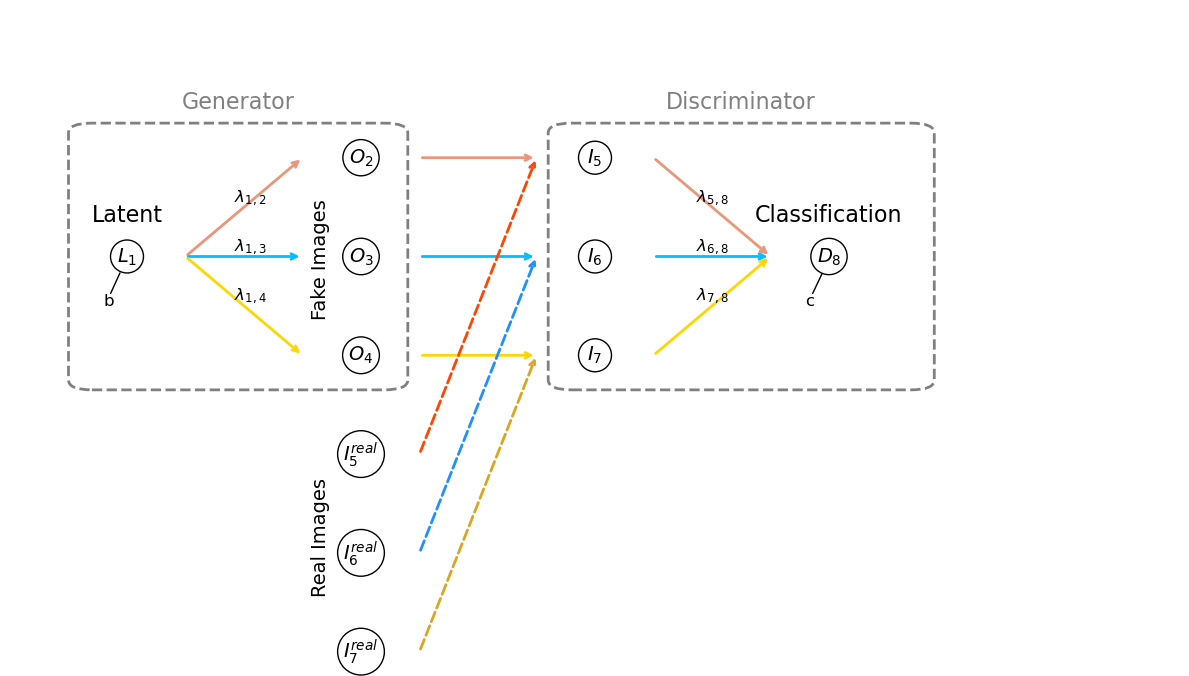

In [10]:
colors = ['darksalmon','deepskyblue','gold']                  # line colors for latent to fake to probability flow
colors_real = ['orangered','dodgerblue','goldenrod']          # line colors for real image to probability flow

def draw_gan_architecture_full():                             # function to draw the GAN demonstrated in this workflow
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.text(0.1, 0.5, r"$L_1$", fontsize=14, ha='center', va='center', # generator latent node
            bbox=dict(boxstyle="circle", fc="white", ec="black"))

    gen_outputs = [                                           # generator output nodes
        (0.3, 0.7, r"$O_2$", r"$\lambda_{1,2}$"),
        (0.3, 0.5, r"$O_3$", r"$\lambda_{1,3}$"),
        (0.3, 0.3, r"$O_4$", r"$\lambda_{1,4}$")
    ]
    for i, (x, y, label, weight) in enumerate(gen_outputs):  
        ax.text(x, y, label, fontsize=14, ha='center', va='center',
                bbox=dict(boxstyle="circle", fc="white", ec="black"))
        ax.annotate("",
                    xy=(x - 0.05, y), xytext=(0.15, 0.5),
                    arrowprops=dict(arrowstyle="->", lw=2, color=colors[i]))
        ax.text((x + 0.11) / 2, (y + 0.5) / 2, weight, fontsize=12, ha='center', va='bottom')

    disc_inputs = [                                           # discriminator input nodes
        (0.5, 0.7, r"$I_5$", r"$\lambda_{5,8}$"),
        (0.5, 0.5, r"$I_6$", r"$\lambda_{6,8}$"),
        (0.5, 0.3, r"$I_7$", r"$\lambda_{7,8}$")
    ]
    for i, (x, y, label, _) in enumerate(disc_inputs):
        ax.text(x, y, label, fontsize=14, ha='center', va='center',
                bbox=dict(boxstyle="circle", fc="white", ec="black"))
        ax.annotate("",
                    xy=(x - 0.05, y), xytext=(0.35, gen_outputs[i][1]),
                    arrowprops=dict(arrowstyle="->", lw=2, color=colors[i]))

    ax.text(0.7, 0.5, r"$D_8$", fontsize=14, ha='center', va='center', # discriminator decision node
            bbox=dict(boxstyle="circle", fc="white", ec="black"))
    for i, (x, y, _, weight) in enumerate(disc_inputs):
        ax.annotate("",
                    xy=(0.65, 0.5), xytext=(x + 0.05, y),
                    arrowprops=dict(arrowstyle="->", lw=2, color=colors[i]))
        ax.text((x + 0.7) / 2, (y + 0.5) / 2, weight, fontsize=12, ha='center', va='bottom')

    real_inputs = [                                           # real data path below generator
        (0.3, 0.1, r"$I_5^{real}$"),
        (0.3, -0.1, r"$I_6^{real}$"),
        (0.3, -0.3, r"$I_7^{real}$")
    ]
    for i, (x, y, label) in enumerate(real_inputs):
        ax.text(x, y, label, fontsize=14, ha='center', va='center',
                bbox=dict(boxstyle="circle", fc="white", ec="black"))
        # Arrow to discriminator inputs
        ax.annotate("",
                    xy=(disc_inputs[i][0] - 0.05, disc_inputs[i][1]), 
                    xytext=(x + 0.05, y),
                    arrowprops=dict(arrowstyle="->", lw=2, color=colors_real[i], linestyle="--"))
    
    ax.text(0.1, 0.57, "Latent", fontsize=16, ha='center')    # part labels
    ax.text(0.7, 0.57, "Classification", fontsize=16, ha='center')
    ax.text(0.265, -0.18, "Real Images", fontsize=14, ha='center', color="black",rotation=90.0)
    ax.text(0.265, 0.38, "Fake Images", fontsize=14, ha='center', color="black",rotation=90.0)

    fancybox(ax, xy=(0.07, 0.25), width=0.25, height=0.5, label="Generator", edgecolor="grey")
    fancybox(ax, xy=(0.48, 0.25), width=0.29, height=0.5, label="Discriminator", edgecolor="grey")

    ax.text(0.68,0.4,'c',fontsize=12,color='black')           # draw the biases
    ax.annotate("", xy=(0.695, 0.47), xytext=(0.685, 0.42),arrowprops=dict(arrowstyle="-", color="black", lw=1))
    ax.text(0.08,0.4,'b',fontsize=12,color='black')
    ax.annotate("", xy=(0.095, 0.472), xytext=(0.085, 0.42),arrowprops=dict(arrowstyle="-", color="black", lw=1))
    ax.axis('off')
    plt.tight_layout()
    plt.show()

draw_gan_architecture_full()                                  # draw the GAN         

Now let's walk-through all the parts of our example GAN and show all the math.

#### Generator Forward Pass

First, let's walk through the generator to go from a latent value to a fake image. The generator takes a latent input,

$$
z \sim \mathcal{U}(0.4, 1)
$$

Our simple generator has only one layer (L1), with only 3 outputs, $O_2$, $O_3$, and $O_4$, representing the fake image.

* Our transpose convolution kernel has a size of 3, so we don't see it translate, resulting in simplified book keeping!

* The kernel weights are $\lambda_{1,2}$, $\lambda_{1,3}$, and $\lambda_{1,4}$

* We apply the sigmoid activation in each of the output nodes

Each output is computed by applying a linear transformation followed by a **sigmoid** activation, $\sigma$,

$$
O_2 = \sigma(\lambda_{1,2} \cdot z + b)
$$

$$
O_3 = \sigma(\lambda_{1,3} \cdot z + b)
$$

$$
O_4 = \sigma(\lambda_{1,4} \cdot z + b)
$$

Where:

- $\lambda_{1,j}$ are the transpose convolution kernel weights
- $b$ is the shared bias, single bias term for the output layer
- $\sigma(x) = \dfrac{1}{1 + e^{-x}}$ is the sigmoid activation function

We can also write the generator forward pass in matrix notation as,

$$
\begin{bmatrix}
O_2 \\
O_3 \\
O_4
\end{bmatrix}
=
\sigma\left(
\begin{bmatrix}
\lambda_{1,2} \\
\lambda_{1,3} \\
\lambda_{1,4}
\end{bmatrix}
z + 
\begin{bmatrix}
b \\
b \\
b
\end{bmatrix}
\right)
$$

where the sigmoid activation is applied element-wise.

#### Discriminator Forward Pass

Now let's walk-through the discriminator, going from an image, real or fake, to a probability of real. The discriminator receives the image, over 3 input nodes, $I_5$, $I_6$, and $I_7$. In the case of a fake image, 

$$
\begin{bmatrix}
I_5 \\
I_6 \\
I_7
\end{bmatrix}
=
\begin{bmatrix}
O_2 \\
O_3 \\
O_4
\end{bmatrix}
$$

and in the case of a real image, 

$$
\begin{bmatrix}
I_5 \\
I_6 \\
I_7
\end{bmatrix}
=
\begin{bmatrix}
I_5^{real} \\
I_6^{real} \\
I_7^{real}
\end{bmatrix}
$$

Since we have only 1 layer and the convolution kernel is 3 with an input of 3 once again there is no translation! 

* we just take input image, $I_5$, $I_6$, and $I_7$, and apply the convolutional kernel weights, $\lambda_{5,8}$, $\lambda_{6,8}$, and $\lambda_{7,8}$, and add the bias term, $c$,

$$
D_8 = \sigma\left(
\lambda_{5,8} \cdot I_5 +
\lambda_{6,8} \cdot I_6 +
\lambda_{7,8} \cdot I_7 + c
\right)
$$

where,

* $\lambda_{i,8}$ are the convolutional kernel weights to go from input image to next feature map, only 1 value, our output probability
* $c$ is the bias term
- $\sigma(x) = \dfrac{1}{1 + e^{-x}}$ is the sigmoid activation function

$D_8 \in [0, 1]$ represents the probability assigned by the discriminator that the input is **real** (i.e. not a fake from the generator).

We can also write the discriminator forward pass in matrix notation as,

$$
D_8 = \sigma\left(
\begin{bmatrix}
\lambda_{5,8} & \lambda_{6,8} & \lambda_{7,8}
\end{bmatrix}
\cdot
\begin{bmatrix}
I_5 \\
I_6 \\
I_7
\end{bmatrix}
+ c
\right)
$$

where,

- $\lambda_{5,8}, \lambda_{6,8}, \lambda_{7,8}$ are scalar weights
- $I_5, I_6, I_7$ are the input values (i.e., outputs of the generator, $O_2, O_3, O_4$)
- $c$ is the bias term
- $\sigma(x) = \dfrac{1}{1 + e^{-x}}$ is the sigmoid function

#### Discriminator Loss

Binary cross-entropy is a loss function used for binary classification tasks where the output is a probability between 0 and 1, and the target label is either 0 or 1.

* **Prediction** (model output) - $\hat{y} \in (0, 1)$, the output of $D_8$, the discriminator's classification, probability that the image is real 

$$
\hat{y} = D_8
$$
  
* **True label** (ground truth) - $y \in \{0, 1\}$, 0 if the image is from the generator, fake, and 1 if the image is from the real training data

Now we can define the **binary cross-entropy loss** as,

$$
\mathcal{L}_{\text{BCE}}(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

now we can further specify, 

* $\log(\hat{y})$ is the log-likelihood of the positive prediction
* $log(1 - \hat{y})$ is the log-likelihood of the negative prediction 

how does binary cross-entropy behave?

* if $y = 1$ (real image), then:

$$
\mathcal{L} = -\log(\hat{y}) \quad \text{(we want } \hat{y} \to 1)
$$

* if $y = 0$ (fake image from the generator), then:

$$
\mathcal{L} = -\log(1 - \hat{y}) \quad \text{(we want } \hat{y} \to 0)
$$

We can summarize as,

* the loss is **low** when the model’s prediction \( \hat{y} \) is **close to the true label**, low probability of real for a fake image and high probability of real for a real image

* the loss becomes **very large** if the model is **confident and wrong**, due to the logarithm, i.e., very low probability or real for a real image and very high probability of real for a fake image

* the sigmoid activation ensures that the output, $\hat{y}$ is a valid probability 

#### Discriminator Loss Derivative 

To perform backpropagation we need to calculate the loss derivative. Let's do this for the input of the activation function as our output node, $D_8$,

$$
\frac{d\mathcal{L}}{dz}
$$

* define $z$ as the input for the sigmoid activation as output node, $D_8$. 

* as you see we do this because it results in a very simple, efficient result.

* recall, the sigmoid function,

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

We will use the chain rule, so we only need to solve the parts, 

$$
\frac{d\mathcal{L}}{dz} = \frac{d\mathcal{L}}{d\hat{y}} \cdot \frac{d\hat{y}}{dz}
$$

* $\frac{d\mathcal{L}}{d\hat{y}}$ - partial derivative of binary cross-entropy loss given the discriminator output $\hat{y}$ ($D_8$)

* $\frac{d\hat{y}}{dz}$ - partial derivative of the discriminator output $\hat{y}$ ($D_8$) given the sigmoid activation input

Now we can solve the first part, partial derivative of loss with respect to the discriminator output, $\hat{y}$

$$
\frac{d\mathcal{L}}{d\hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
$$

now we can solve the second part, the partial derivative of the discriminator output $\hat{y}$ ($D_8$) given the sigmoid activation input, it is just the sigmoid derivative,

$$
\frac{d\hat{y}}{dz} = \hat{y}(1 - \hat{y})
$$

and we can combine these by the chain rule as,

$$
\frac{d\mathcal{L}}{dz} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y}(1 - \hat{y})
$$

We are almost there, we only need to simplify the result, first we distribute, $\hat{y}(1 - \hat{y})$,

$$
\frac{d\mathcal{L}}{dz} = -\left[ y(1 - \hat{y}) - (1 - y)\hat{y} \right]
$$

and then simplify it further,

$$
\frac{d\mathcal{L}}{dz} = -\left[ y - y\hat{y} - \hat{y} + y\hat{y} \right]
= -\left[ y - \hat{y} \right]
= \hat{y} - y
$$

I said this would get simple! Our partial derivative of our loss with respect to the input to the output node sigmoid activation function, $z$, is, 

$$
\frac{d\mathcal{L}}{dz} = \hat{y} - y
$$

This result shows the gradient is just the **error** — the difference between predicted and true values.

Now we can make this simple interpretation,

* if $\hat{y} > y$, the model overestimates $\rightarrow$ gradient is positive $\rightarrow$ lower prediction by moving in the negative gradient
* if $\hat{y} < y$, the model underestimates $\rightarrow$ gradient is negative $\rightarrow$ increase prediction by moving in the negative gradient

I know that a title this section "Discriminator Loss Derivative", but excuse me for performing just a little bit of backpropagation (to before sigmoid activation). 

* next we carry on with back propagation to the discriminator weights and biases

#### Discriminator Back Propagation 

For compact notation, let's use matrix notation and define the input to the $D_8$ activation, $z$, as,

$$
z = \mathbf{w}^\top \mathbf{x} + c \quad \Rightarrow \quad \frac{dz}{d\mathbf{w}} = \mathbf{x}
$$

Now we can extend our use of the chain rule to,

$$
\frac{d\mathcal{L}}{d\mathbf{w}} = \frac{d\mathcal{L}}{dz} \cdot \frac{dz}{d\mathbf{w}} = (\hat{y} - y) \cdot \mathbf{x}
$$

So for each of our discriminator weights, $\lambda_{5,8}$, $\lambda_{6,8}$, and $\lambda_{7,8}$ we have,

$$
\frac{d\mathcal{L}}{d\lambda_{5,8}} = (\hat{y} - y) \cdot I_5
$$

$$
\frac{d\mathcal{L}}{d\lambda_{6,8}} = (\hat{y} - y) \cdot I_6
$$

$$
\frac{d\mathcal{L}}{d\lambda_{7,8}} = (\hat{y} - y) \cdot I_7
$$

and for the bias, $c$, we calculate the next component for the chain rule as, 

$$
\frac{dz}{dc} = 1
$$

so we have,

$$
\frac{d\mathcal{L}}{dc} = \frac{d\mathcal{L}}{dz} \cdot \frac{dz}{dc} = (\hat{y} - y) \cdot 1 = \hat{y} - y
$$

The backpropagation for our very simple discriminator is quite simple, we can summarize for the weights,

$$
\frac{d\mathcal{L}}{d\mathbf{w}} = (\hat{y} - y) \cdot \mathbf{x}
$$

and for the bias, 

$$
\frac{d\mathcal{L}}{dc} = \hat{y} - y
$$

Let's write these out for all of our discriminators parameters, 
$$
\begin{aligned}
\frac{d\mathcal{L}}{d\lambda_{5,8}} &= (\hat{y} - y) \cdot I_5 \\
\frac{d\mathcal{L}}{d\lambda_{6,8}} &= (\hat{y} - y) \cdot I_6 \\
\frac{d\mathcal{L}}{d\lambda_{7,8}} &= (\hat{y} - y) \cdot I_7 \\
\frac{d\mathcal{L}}{dc} &= \hat{y} - y
\end{aligned}
$$

#### Generator Loss Derivative and Back Propagation Through the Discriminator

Recall that the goal of the generator is to make fake images the discriminator assigns as a high probability of a real image, i.e., to fool the discriminator

* the generator produces a fake image, 

$$ 
\tilde{\mathbf{x}} = G(z) 
$$

$\quad$ where \( z \) is a latent vector (e.g., sampled from Uniform[0.4, 1]).

* the discriminator evaluates this fake sample and returns:

$$
\hat{y} = D(\tilde{\mathbf{x}}) \in (0, 1)
$$

Now we can calculate the binary cross-entropy for the generator as,

$$
\mathcal{L}_G = -\log(\hat{y})
$$

where, 

* $\hat{y} = D(G(z))$, the discriminator's evaluation of the generator's fake image, $z$
  
* $\hat{y}$ is the probability assigned by the discriminator to the fake being real
  
This is equivalent to cross-entropy with **target label \( y = 1 \)**

Let's show how to back propagate through the entire discriminator with the chain rule. 

* we want the generator loss gradient with respect generator output,

Given $\tilde{\mathbf{x}} = G(z)$, our fake image, we want the partial derivative of the loss given our fake image,

$$
\frac{d\mathcal{L}_G}{d\tilde{\mathbf{x}}}
$$

and by the chain rule,

$$
\frac{d\mathcal{L}_G}{d\tilde{\mathbf{x}}} = \frac{d\mathcal{L}_G}{d\hat{y}} \cdot \frac{d\hat{y}}{d\tilde{\mathbf{x}}}
$$

This is how the discriminator's belief $\hat{y}$​ about "fakeness" changes with changes in $\tilde{\mathbf{x}}$ the fake image.

Now we are ready to back propagate the generator loss through the discriminator, let's start with our generator loss (from above),

$$
\mathcal{L}_G = -\log(\hat{y})
$$

and when we perform the partial derivative,

$$
\frac{d\mathcal{L}_G}{d\hat{y}} = -\frac{1}{\hat{y}}
$$

Now, recall the discriminator's forward pass is,

$$
\hat{y} = \sigma(\mathbf{w}^\top \tilde{\mathbf{x}} + c)
$$

so we can calculate the partial derivative of the discriminator's output with respect to the generator's fake image as,

$$
\frac{d\hat{y}}{d\tilde{\mathbf{x}}} = \hat{y}(1 - \hat{y}) \cdot \mathbf{w}
$$

now we combine these with the chain rule as,

$$
\frac{d\mathcal{L}_G}{d\tilde{\mathbf{x}}}
= \left( -\frac{1}{\hat{y}} \right) \cdot \left( \hat{y}(1 - \hat{y}) \cdot \mathbf{w} \right)
= -(1 - \hat{y}) \cdot \mathbf{w}
$$

The gradient of the generator's loss with respect to the output image $\tilde{\mathbf{x}}$ is,

$$
\frac{d\mathcal{L}_G}{d\tilde{\mathbf{x}}} = -(1 - \hat{y}) \cdot \mathbf{w}
$$

We can add some interpretations of this result,

* when $\hat{y}$ is close to 0 $\rightarrow$ discriminator easily spots fake $\rightarrow$ large gradient $\rightarrow$ generator updates more.

* when $\hat{y}$ is close to 1 $\rightarrow$ generator is fooling the discriminator $\rightarrow$ gradient is small.

This guides the generator to tweak its output to increase $\hat{y}$ — i.e., fool the discriminator.

To further clarify, for our example let's compute how the discriminator's output $\hat{y}$ changes with respect to the generator outputs $O_5, O_6, O_7$, instead of the $w$ vector notation used above.

* if we apply the chain rule we get,

$$
\frac{d\hat{y}}{dO_i} = \frac{d\hat{y}}{dz} \cdot \frac{dz}{dO_i}
$$

$\quad$ for each of the components we have,

$$
\frac{d\hat{y}}{dz} = \hat{y}(1 - \hat{y})
$$

$$
\frac{dz}{dO_5} = \lambda_{5,8}
$$

$$
\frac{dz}{dO_6} = \lambda_{6,8}
$$

$$
\frac{dz}{dO_7} = \lambda_{7,8}
$$

$\quad$ substituting in the chain rule we have,

$$
\frac{d\hat{y}}{dO_5} = \hat{y}(1 - \hat{y}) \cdot \lambda_{5,8}
$$

$$
\frac{d\hat{y}}{dO_6} = \hat{y}(1 - \hat{y}) \cdot \lambda_{6,8}
$$

$$
\frac{d\hat{y}}{dO_7} = \hat{y}(1 - \hat{y}) \cdot \lambda_{7,8}
$$

#### Backpropagation Through Generator to Weights and Bias

We now propagate through the generators sigmoid activation in each of the output nodes,

$$
\frac{dO_i}{dz_i} = O_i (1 - O_i)
$$

* $O_i = \sigma(z_i)$, where $z_i$ is the input for the output nodes, pre-activation, and $O_i$ is output for the output nodes, post-activation

We Apply chain rule,

$$
\frac{d\mathcal{L}_G}{dz_i} = \frac{d\mathcal{L}_G}{dO_i} \cdot \frac{dO_i}{dz_i}
= \frac{d\mathcal{L}_G}{dO_i} \cdot O_i (1 - O_i)
$$

Recall, 

$$
z_i = \lambda_{1,i} \cdot L_1 + b
$$

so we can calculate the generator's weights partial derivatives as,

$$
\frac{dz_i}{d\lambda_{1,i}} = L_1
$$

and the generator's bias partial derivative as,

$$
\frac{dz_i}{db} = 1
$$

Now we can put this all together with the chain rule, the partial derivatives of the generator loss with respect to the generator weights are,

$$
\frac{d\mathcal{L}_G}{d\lambda_{1,i}} =
\frac{d\mathcal{L}_G}{dz_i} \cdot \frac{dz_i}{d\lambda_{1,i}} =
\left( \frac{d\mathcal{L}_G}{dO_i} \cdot O_i (1 - O_i) \right) \cdot L_1
$$

and the partial derivative of the generator loss with respect to the generator bias is,

$$
\frac{d\mathcal{L}_G}{db} =
\sum_{i=5}^7 \frac{d\mathcal{L}_G}{dz_i} \cdot \frac{dz_i}{db} =
\sum_{i=5}^7 \left( \frac{d\mathcal{L}_G}{dO_i} \cdot O_i (1 - O_i) \right)
$$

For clarity, let's write this out for each of our generator's weights, 

$$
\frac{d\mathcal{L}_G}{d\lambda_{1,2}} =
-(1 - \hat{y}) \cdot \lambda_{5,8} \cdot O_5 (1 - O_5) \cdot L_1
$$

$$
\frac{d\mathcal{L}_G}{d\lambda_{1,3}} =
-(1 - \hat{y}) \cdot \lambda_{6,8} \cdot O_6 (1 - O_6) \cdot L_1
$$

$$
\frac{d\mathcal{L}_G}{d\lambda_{1,4}} =
-(1 - \hat{y}) \cdot \lambda_{7,8} \cdot O_7 (1 - O_7) \cdot L_1
$$

and for our generator's bias,

$$
\frac{d\mathcal{L}_G}{db} =
-(1 - \hat{y}) \cdot \left[
\lambda_{5,8} \cdot O_5(1 - O_5)
+ \lambda_{6,8} \cdot O_6(1 - O_6)
+ \lambda_{7,8} \cdot O_7(1 - O_7)
\right]
$$

Let's make some interpretations, 

* the generator's weights and bias gradients scale with how much the discriminator is fooled ($1 - \hat{y}$)

* the generator learns to tweak $\lambda_{1,i}$ and $b$ to push the fake images, $O_5$, $O_6$ and $O_7$ in directions that increase $\hat{y}$
  
* this flow of error gives the generator a signal to **fool the discriminator more effectively** without ever seeing a real image!

#### Simple GAN Training Workflow

We start with initialization of the generator and discriminator weights and bias and setting the training hyperparameters. 

1. Generate the Synthethic, "Real Images" for training

* sample $N$ real 3-node, 1D images $\mathbf{I} = \{(I_{5,i}, I_{6,i}, I_{7,i})\}_{i=1}^N$
    
* use the synthetic training data function:  

$$
\text{Real images} \sim \text{linear decreasing trend} + \text{noise}
$$


2. **Initialize generator weights and bias** - the weights,

$$
\{\lambda_{1,2}, \lambda_{1,3}, \lambda_{1,4}, b\} \leftarrow \text{small random values}
$$

$\quad$ and the bias, 

$$
b \leftarrow 0.0
$$

3. **Initialize discriminator weights and bias** - the weights, 

$$
\{\lambda_{5,8}, \lambda_{6,8}, \lambda_{7,8}, c\} \leftarrow \text{small random values}
$$

$\quad$ and the bias, 

$$
c \leftarrow 0.0
$$

4. **Set model training hyperparameters** - this includes,

* Learning Rates - for the generator, $\eta_G$, and discriminator, $\eta_D$  

* Batch Size - in this example we are assuming batch size equal to the number of real images

* Epochs - number of training iterations

5. **Train the discriminator**

* combine real and fake inputs into a batch of size $2N$ and inlcude labels $y_i = 1$ for real, $y_i = 0$ for fake  

* compute discriminator outputs $\hat{y}_i = D(I_{5,i}, I_{6,i}, I_{7,i})$  

* calculate discriminator loss and gradients using:  

$$
\frac{\partial \mathcal{L}}{\partial \lambda_{j,8}}, \quad \frac{\partial \mathcal{L}}{\partial c}
$$

* update discriminator weights and bias:  

$$
\lambda_{j,8} \leftarrow \lambda_{j,8} - \eta_D \times \frac{\partial \mathcal{L}}{\partial \lambda_{j,8}}, \quad
  c \leftarrow c - \eta_D \times \frac{\partial \mathcal{L}}{\partial c}
$$

5. **Train the generator**
 
* Compute generator output fake images and pass to the discriminator to evaluate the outputs on these fakes, $D_8$ same as $y$

* Calculate generator loss gradients using,

$$
\frac{\partial \mathcal{L}_G}{\partial \lambda_{1,j}}, \quad \frac{\partial \mathcal{L}_G}{\partial b}
$$

* Update generator weights and bias, 

$$
\lambda_{1,j} \leftarrow \lambda_{1,j} - \eta_G \times \frac{\partial \mathcal{L}_G}{\partial \lambda_{1,j}}, \quad
  b \leftarrow b - \eta_G \times \frac{\partial \mathcal{L}_G}{\partial b}
$$

6. **Repeat Until Convergence** - or stop criteria is met, such as maximum number of training epochs, return to step 5.

Here a summary of the training loop, 

1. Generate real data batch  
2. Generate fake data batch  
3. Update discriminator to better distinguish real/fake  
4. Update generator to fool discriminator  
5. Repeat

This adversarial training loop lets the generator learn to create data mimicking the real distribution, and the discriminator improve in spotting fakes.

Epoch 0: D_loss = 1.3181, G_loss = 0.6909
Epoch 1000: D_loss = 1.2445, G_loss = 0.6723
Epoch 2000: D_loss = 1.2650, G_loss = 0.6292
Epoch 3000: D_loss = 1.2955, G_loss = 0.6195
Epoch 4000: D_loss = 1.2948, G_loss = 0.6584
Epoch 5000: D_loss = 1.3010, G_loss = 0.6991
Epoch 6000: D_loss = 1.3335, G_loss = 0.6973
Epoch 7000: D_loss = 1.4199, G_loss = 0.6486
Epoch 8000: D_loss = 1.4667, G_loss = 0.5782
Epoch 9000: D_loss = 1.5111, G_loss = 0.5936
Epoch 9999: D_loss = 1.4460, G_loss = 0.6302


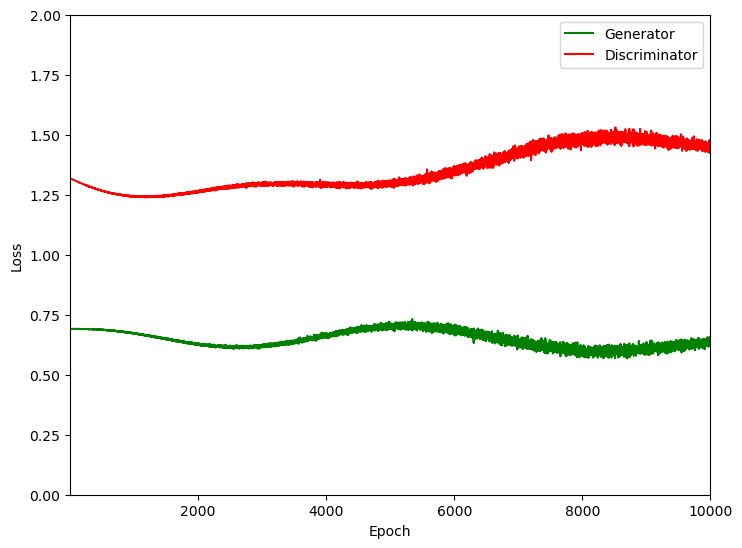

In [18]:
def train_gan(epochs=1000,batch_size=32,lr_g=0.1,lr_d=0.1,verbose=True): # function for training the GAN
    weights_epoch_list = []; weights_g_list = []
    # Initialize weights
    weights_g = initialize_generator_weights()
    weights_d = initialize_discriminator_weights()
    
    # Tracking losses
    generator_losses = []
    discriminator_losses = []

    real_images = generate_real_data(batch_size) # one set of images
    for epoch in range(epochs):
        # Step 1: Generate real data

        I5_real, I6_real, I7_real = real_images[:,0], real_images[:,1], real_images[:,2]
        y_real = np.ones(batch_size)

        # Step 2: Generate fake data
        L1_fake = np.random.uniform(0.4, 1, batch_size)
        fake_images = generator_forward(L1_fake, weights_g)
        I5_fake, I6_fake, I7_fake = fake_images[:,0], fake_images[:,1], fake_images[:,2]
        y_fake = np.zeros(batch_size)

        # Combine for discriminator training
        I5_combined = np.concatenate([I5_real, I5_fake])
        I6_combined = np.concatenate([I6_real, I6_fake])
        I7_combined = np.concatenate([I7_real, I7_fake])
        y_combined = np.concatenate([y_real, y_fake])

        # Step 3: Train discriminator
        grads_d = discriminator_gradients(I5_combined, I6_combined, I7_combined, y_combined, weights_d)
        for key in weights_d:
            weights_d[key] -= lr_d * grads_d[key]

        # Step 4: Train generator
        L1_gen = np.random.uniform(0.4, 1, batch_size)
        grads_g = generator_gradients(L1_gen, weights_g, weights_d)
        for key in weights_g:
            weights_g[key] -= lr_g * grads_g[key]
        # if epoch in [1000,2500,5000]: # save the weights to visualize model improvement over epochs
            # weights_g_list.append(weights_g)
        
        # Step 5: Calculate and store losses
        y_pred_real, _ = discriminator_forward(I5_real, I6_real, I7_real, weights_d)
        y_pred_fake, _ = discriminator_forward(I5_fake, I6_fake, I7_fake, weights_d)
        loss_d_real = -np.mean(np.log(y_pred_real + 1e-8))
        loss_d_fake = -np.mean(np.log(1 - y_pred_fake + 1e-8))
        loss_d = loss_d_real + loss_d_fake
        discriminator_losses.append(loss_d)

        y_pred_gen, _ = discriminator_forward(*generator_forward(L1_gen, weights_g).T, weights_d)
        loss_g = -np.mean(np.log(y_pred_gen + 1e-8))
        generator_losses.append(loss_g)

        # Print progress
        if verbose and (epoch % 1000 == 0 or epoch == epochs - 1):
            weights_epoch_list.append(epoch)
            weights_g_list.append(copy.deepcopy(weights_g))
            print(f"Epoch {epoch}: D_loss = {loss_d:.4f}, G_loss = {loss_g:.4f}")

    # # Final output
    # print("\nTraining complete.\nFinal Generator Weights:")
    # for k, v in weights_g.items():
    #     print(f"  {k}: {v:.4f}")
    
    # print("\nFinal Discriminator Weights:")
    # for k, v in weights_d.items():
    #     print(f"  {k}: {v:.4f}")

    return weights_g, weights_d, generator_losses, discriminator_losses, real_images, weights_g_list, weights_epoch_list

np.random.seed(seed=seed)
epochs = 10000
batch_size = 32
final_weights_g, final_weights_d, loss_g, loss_d, real_images, weights_g_list, weights_epoch_list = train_gan(epochs=epochs, batch_size=batch_size, lr_g=0.001, lr_d=0.001)

plt.plot(np.arange(1,epochs+1,1),loss_g,color='green',label='Generator')
plt.plot(np.arange(1,epochs+1,1),loss_d,color='red',label='Discriminator')
plt.xlim(1,epochs); plt.ylim(0,2.0); plt.ylabel('Loss'); plt.xlabel('Epoch'); plt.legend(loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Visualize Real Images and Trained Generator Fake Images

Let's check a set of fake images from our trained generator against the real images.

* recall the generator never saw these images, the discriminator saw the real and fake images and told the generator how good or bad were the generator's fake images.

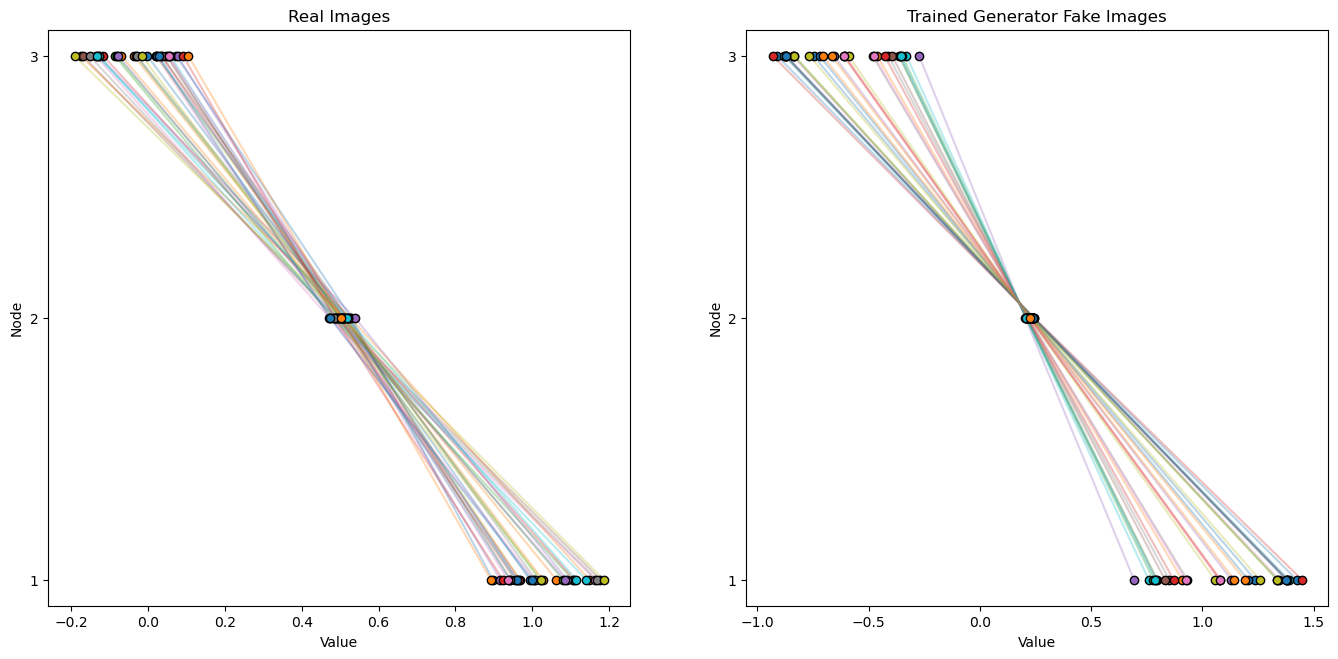

In [20]:
L1_test = np.random.uniform(0.4, 1, batch_size) 
trained_fake = generator_forward(L1_test, weights_g_list[-1])
untrained_fake = generator_forward(L1_test, weights_g_list[0])

plt.subplot(121)
for i in range(0,batch_size):
    plt.plot(real_images[i],np.arange(1,4,1),alpha=0.3)
    plt.scatter(real_images[i],np.arange(1,4,1),edgecolor='black',zorder=10)
    plt.title('Real Images'); plt.xlabel('Value'); plt.ylabel('Node'); plt.yticks([1, 2, 3])

plt.subplot(122)
for i in range(0,batch_size):
    plt.plot(trained_fake[i],np.arange(1,4,1),alpha=0.3)
    plt.scatter(trained_fake[i],np.arange(1,4,1),edgecolor='black',zorder=10)
    plt.title('Trained Generator Fake Images'); plt.xlabel('Value'); plt.ylabel('Node'); plt.yticks([1, 2, 3])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()


#### Visualize Real Images and Generator Fake Images Over Training Epochs

It is interesting to see how our generator's fake images evolve over the training epochs. 

* as first the fake images are random due to the random initialization of the generator's weights and bias

* as the training proceeds the generator learns to improve the fake images.

I include the real images at the end for comparison.

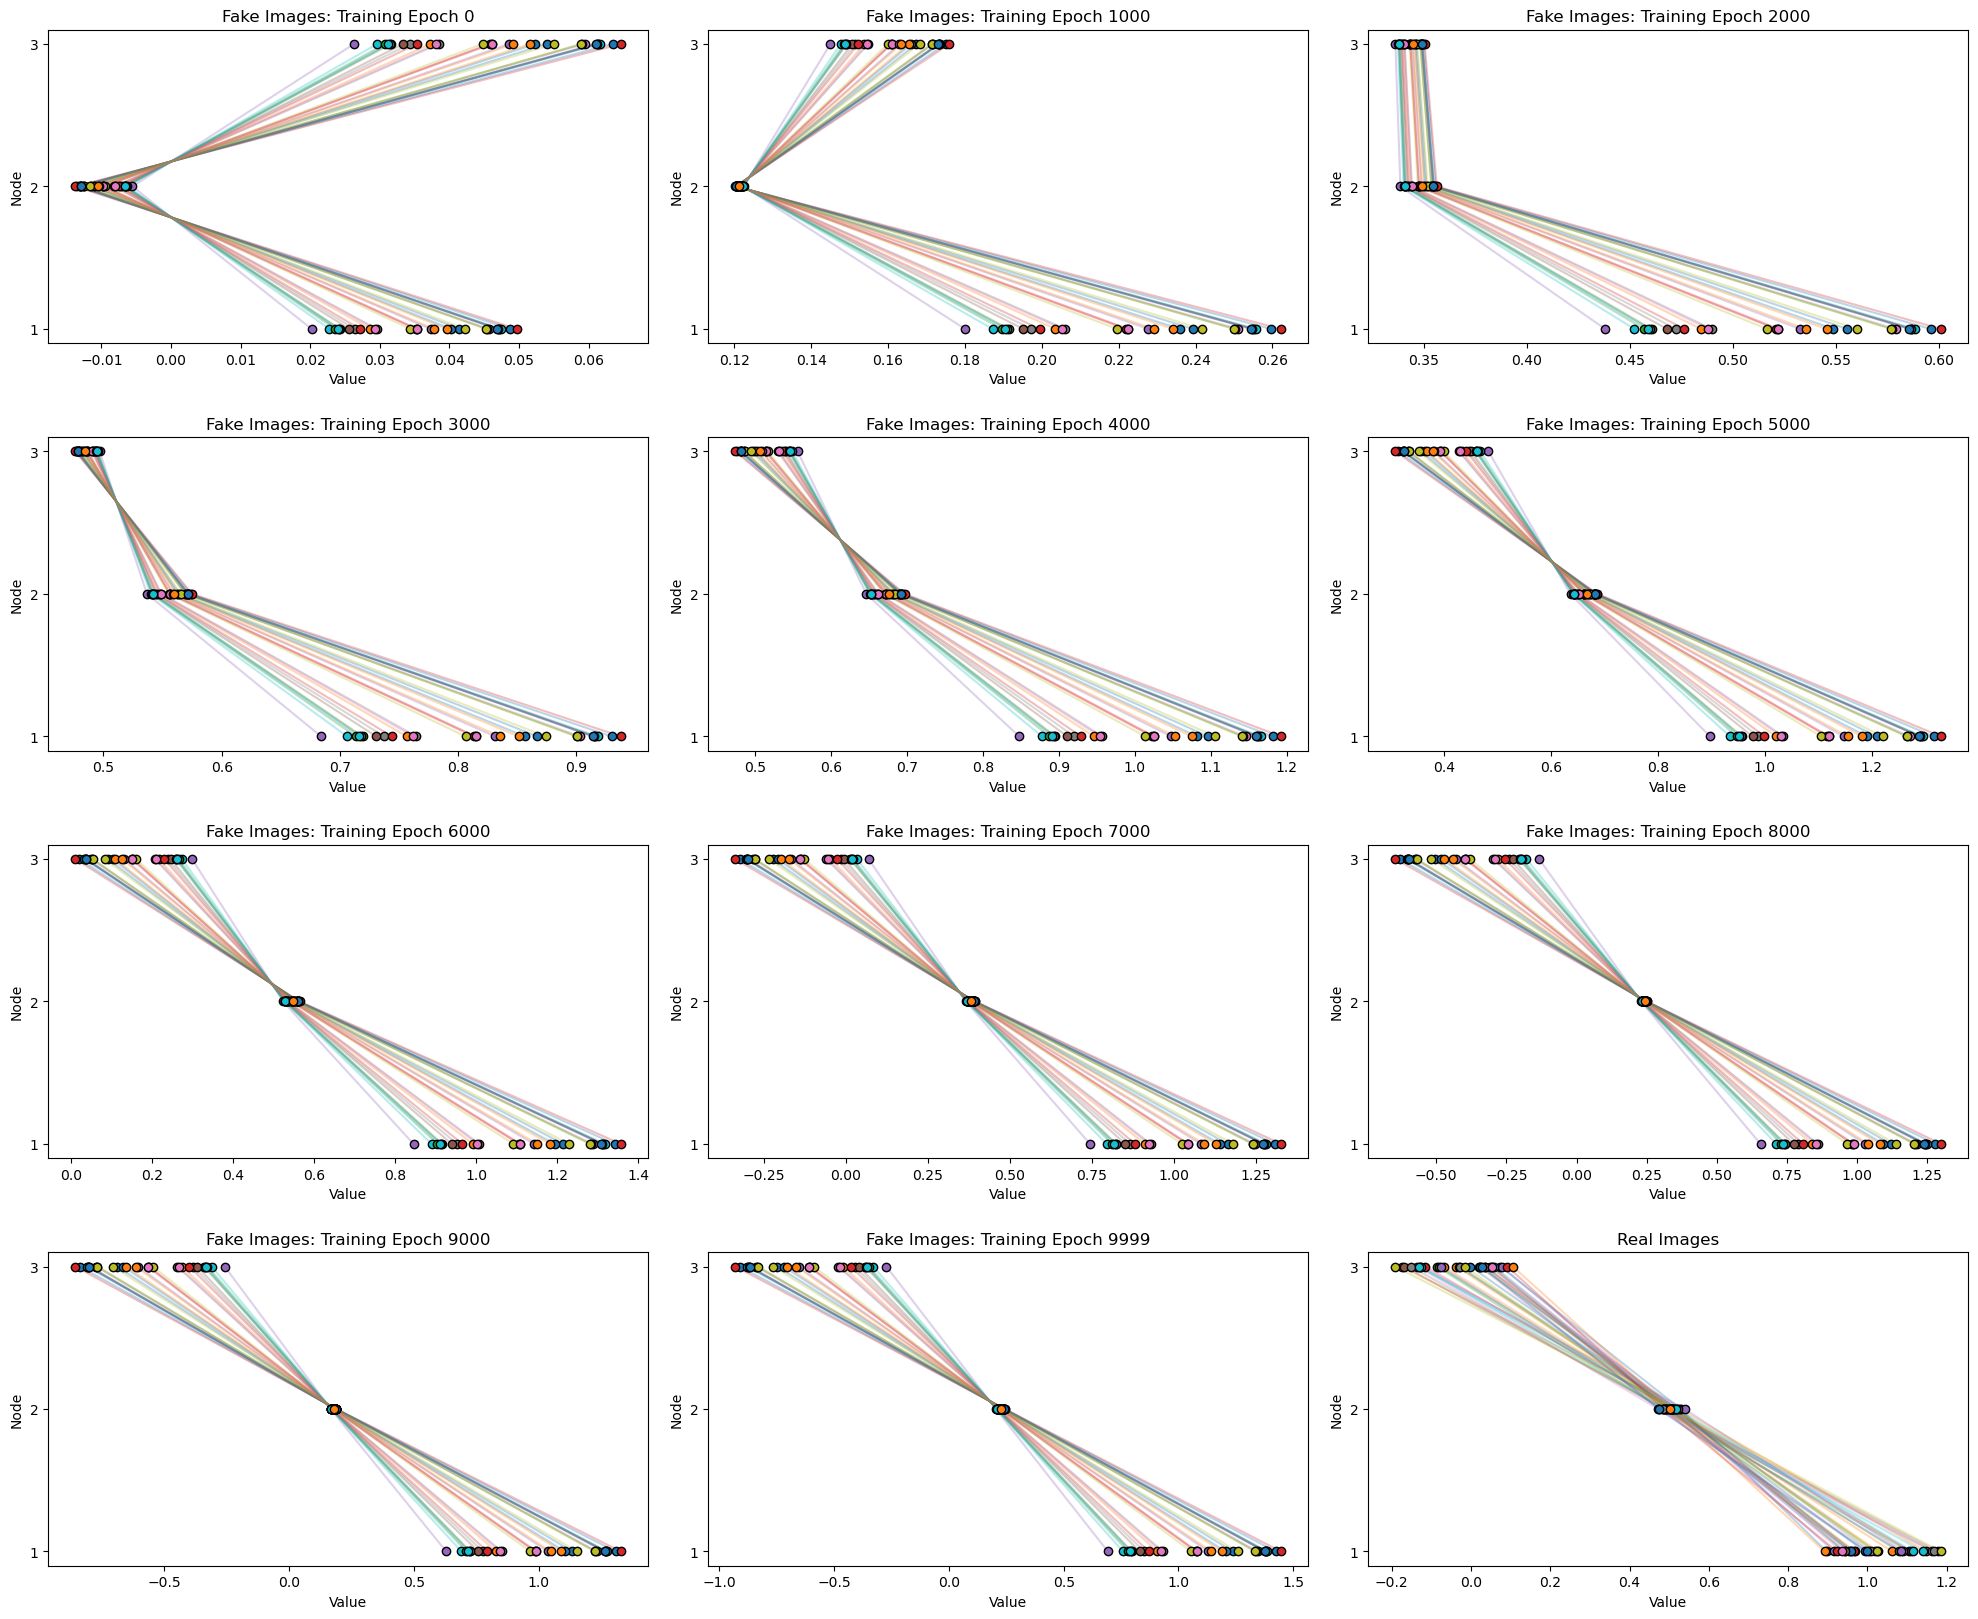

In [22]:
for i,weights_g in enumerate(weights_g_list):
    fake = generator_forward(L1_test, weights_g_list[i])
    plt.subplot(4,3,i+1)
    for j in range(0,batch_size):
        plt.plot(fake[j],np.arange(1,4,1),alpha=0.3)
        plt.scatter(fake[j],np.arange(1,4,1),edgecolor='black',zorder=10)
    plt.title('Fake Images: Training Epoch ' + str(weights_epoch_list[i])); plt.xlabel('Value'); plt.ylabel('Node'); plt.yticks([1, 2, 3])
    plt.subplot(4,3,12)
for i in range(0,batch_size):
    plt.plot(real_images[i],np.arange(1,4,1),alpha=0.3)
    plt.scatter(real_images[i],np.arange(1,4,1),edgecolor='black',zorder=10)
    plt.title('Real Images'); plt.xlabel('Value'); plt.ylabel('Node'); plt.yticks([1, 2, 3])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.1, hspace=0.3); plt.show()

#### Comments

This was a basic treatment of generative adversarial networks. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)